# Homework 3
The purpose of the third homework is to become familiar with Local Interpretable Model-agnostic Explanations (LIME).

Calculate these explanations on the model from previous Homeworks and gather conclusions from the results.

In [5]:
! pip install lime

In [29]:
import shap
import lime
import pickle
import xgboost
import sklearn
import numpy as np
import dalex as dx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.compose import _column_transformer
from sklearn.model_selection import train_test_split

Task
For the selected dataset and models, prepare a knitr/jupyter notebook based on the following points (you can reuse models from previous Homeworks). Submit your results on GitHub to the directory Homeworks/HW3.

Load trained models and training+testing data.

In [16]:
lreg_model = pickle.load(open("logistic_regression_model.sav", 'rb'))
rf_model = pickle.load(open("random_forest_model.sav", 'rb'))

X_train = pd.read_csv("X_train.csv", index_col=0)
X_test = pd.read_csv("X_train.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0)
y_test = pd.read_csv("y_test.csv", index_col=0)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

1. Calculate the predictions for some selected observations

In [18]:
obs = [X_train.iloc[3,], X_train.iloc[33,], X_train.iloc[222,]]
obs = [np.array(i).reshape(1,-1) for i in obs]
obs_preds_lreg = [lreg_model.predict(i) for i in obs]
obs_preds_rf = [rf_model.predict(i) for i in obs]

2. Calculate the decomposition of these predictions with LIME using the package dalex.

In [21]:
explainer_lreg = dx.Explainer(lreg_model, X_train, y_train)
explainer_lreg.model_performance(cutoff=y_train.mean())

Preparation of a new explainer is initiated

  -> data              : 296 rows 32 cols
  -> target variable   : 296 values
  -> model_class       : sklearn.linear_model._base.LinearRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x000001B1D9B6D280> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -2.28, mean = 10.6, max = 20.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -8.48, mean = -3.66, max = 2.28
  -> model_info        : package sklearn

A new explainer has been created!


,mse,rmse,r2,mae,mad
LinearRegression,15.356546,3.918743,-0.091041,3.703434,3.67235


In [22]:
explainer_rf = dx.Explainer(rf_model, X_train, y_train)
explainer_rf.model_performance(cutoff=y_train.mean())

Preparation of a new explainer is initiated

  -> data              : 296 rows 32 cols
  -> target variable   : 296 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x000001B1D9B6D280> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 10.6, max = 19.4
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -4.99, mean = -3.65, max = 0.0
  -> model_info        : package sklearn

A new explainer has been created!


,mse,rmse,r2,mae,mad
RandomForestRegressor,14.229472,3.772197,-0.010965,3.646622,3.92


In [35]:
predictions_lreg = [explainer_lreg.predict(i) for i in obs]
explanations_lreg = [explainer_lreg.predict_surrogate(i) for i in obs]

predictions_rf = [explainer_rf.predict(i) for i in obs]
explanations_rf = [explainer_rf.predict_surrogate(i) for i in obs]

3. Compare LIME for various observations in the dataset. How stable are these explanations?

                  variable    effect
0      11.00 < G2 <= 13.00  2.078975
1           famrel <= 4.00 -0.570182
2      1.00 < Dalc <= 2.00 -0.543368
3         studytime > 2.00 -0.426393
4      11.00 < G1 <= 14.00  0.403957
5      2.00 < Fjob <= 3.00 -0.372853
6        schoolsup <= 0.00 -0.363169
7  0.00 < romantic <= 1.00 -0.332896
8       activities <= 0.00  0.327951
9         guardian <= 1.00 -0.311855


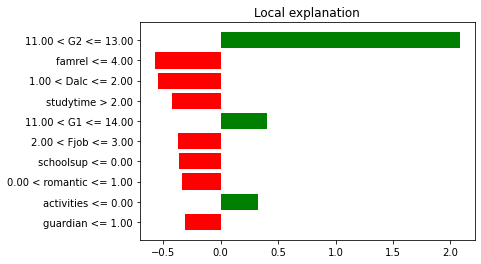

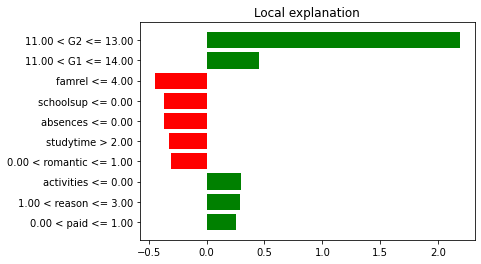

In [43]:
#observarion 3
def plot_observation(o):
    explainer_lreg.predict(o)
    explanation_lreg = explainer_lreg.predict_surrogate(o)
    print(explanation_lreg.result)
    explanation_lreg.plot()

    explainer_rf.predict(o)
    explanation_rf = explainer_lreg.predict_surrogate(o)
    explanation_rf.result
    explanation_rf.plot()

plot_observation(obs[0])

                    variable    effect
0               Dalc <= 1.00  0.640047
1          schoolsup <= 0.00 -0.423783
2         8.00 < G1 <= 11.00 -0.388960
3           guardian <= 1.00 -0.310047
4      4.00 < famrel <= 5.00  0.309661
5         traveltime <= 1.00 -0.307205
6          studytime <= 2.00  0.303270
7    0.00 < romantic <= 1.00 -0.299691
8  0.00 < activities <= 1.00 -0.293907
9           failures <= 0.00  0.266485


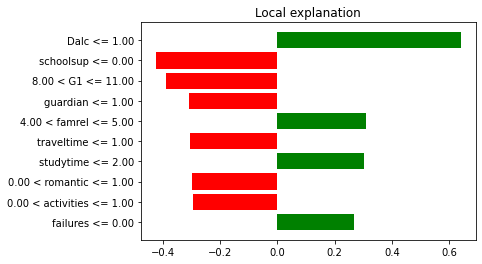

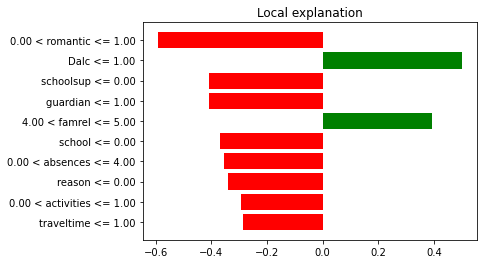

In [44]:
#observarion 33
plot_observation(obs[1])

             variable    effect
0          G2 > 13.00  6.482583
1          G1 > 14.00  1.008798
2     absences > 8.00  0.710702
3        Dalc <= 1.00  0.631409
4    guardian <= 1.00 -0.439297
5    studytime > 2.00 -0.376849
6        goout > 4.00  0.375764
7      famrel <= 4.00 -0.359745
8    romantic <= 0.00  0.292899
9  activities <= 0.00  0.284117


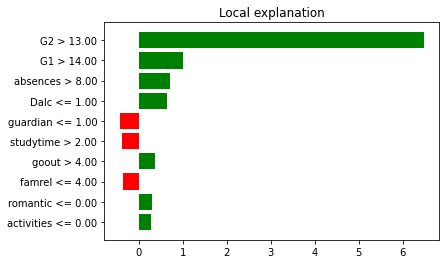

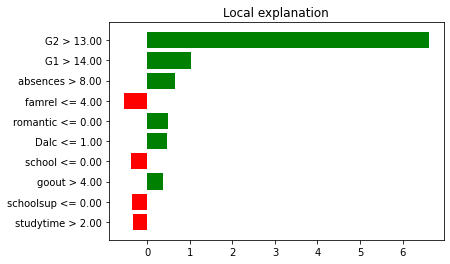

In [45]:
#observarion 222
plot_observation(obs[2])